Proyecto Análisis de datos de ventas, de una tienda online, con Pandas, Matplotlib y Seaborn

**Parte I: Limpieza y Preparación de Datos.:**

**Paso 1: Instalación de Librerías**

In [1]:
pip install pandas matplotlib seaborn reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.9 MB/s eta 0:00:00


**Paso 2: Importación de Librerías y Carga de Datos**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

In [7]:
# Carga de datos en el Dataframe
df = pd.read_csv("ventas_divana.csv", sep=",")

**Paso 3: Exploración Inicial de los Datos**

In [8]:
# Mostrar las primeras filas del DataFrame
print(df.head())

  Fecha de venta    SKU Número de orden  \
0     30-12-2020  D0088       401815275   
1     31-12-2020  D0112       283229442   
2     31-12-2020  D0021     105958663-A   
3     31-12-2020  D0021     105941570-A   
4     01-01-2021  D0015       403931675   

                                           Producto  Cantidad  \
0  Carpa Castillo Princesa 75x75x160cm (013) DACTIC       1.0   
1      Set de Chupete con 2 Tetina de Repuesto Azul       1.0   
2                   Gimnasio piano para bebe Rosado       1.0   
3                   Gimnasio piano para bebe Rosado       1.0   
4                      Extractor Eléctrico de leche       1.0   

   Precio de venta Envío Precio Facturable  Tienda         RUT  
0            36990     0             36990   Linio  lertbtzo-r  
1             9990  3990             13980   Linio  lsopstpp-o  
2            38790  3990             42780  Ripley  zbosbebl-o  
3            38790  4990             43780  Ripley  lttrpbgb-r  
4            39990     0 

In [9]:
# Obtener información sobre las columnas y tipos de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6034 entries, 0 to 6033
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha de venta     6034 non-null   object 
 1   SKU                6025 non-null   object 
 2   Número de orden    6031 non-null   object 
 3   Producto           6034 non-null   object 
 4   Cantidad           5955 non-null   float64
 5   Precio de venta    6034 non-null   int64  
 6   Envío              5977 non-null   object 
 7   Precio Facturable  6034 non-null   object 
 8   Tienda             6034 non-null   object 
 9   RUT                6034 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 471.5+ KB
None


In [10]:
# Obtener estadísticas descriptivas de las columnas numéricas
print(df.describe())

          Cantidad  Precio de venta
count  5955.000000      6034.000000
mean      1.040470     22586.212794
std       0.286068     17959.190931
min       0.000000      2990.000000
25%       1.000000      9990.000000
50%       1.000000     16980.000000
75%       1.000000     29990.000000
max      11.000000    195990.000000


**Paso 4: Identificación y Tratamiento de Datos Duplicados**

In [11]:
# Identificar registros duplicados basados en la columna 'Número de orden'y el 'SKU'
duplicated_orders = df[df.duplicated(subset=['Número de orden', 'SKU'], keep=False)]
print(duplicated_orders.head())

     Fecha de venta    SKU Número de orden  \
1357     07-05-2021  D0191    121523911182   
1358     07-05-2021  D0014    121524014929   
1359     07-05-2021  D0008    121524406052   
1360     07-05-2021  D0008    121518233787   
1361     07-05-2021  D0191    121523911182   

                                               Producto  Cantidad  \
1357  Body Manga Larga + Pantalón + Babero Set 3 Pie...       1.0   
1358                     Extractor de Leche Manual Only       1.0   
1359         Kit de Higiene y cuidado para bebes Rosado       1.0   
1360         Kit de Higiene y cuidado para bebes Rosado       1.0   
1361  Body Manga Larga + Pantalón + Babero Set 3 Pie...       1.0   

      Precio de venta Envío Precio Facturable     Tienda      RUT  
1357            24990  2618             27608  Falabella  Sin RUT  
1358            15990  2618             18608  Falabella  Sin RUT  
1359             9990  2618             12608  Falabella  Sin RUT  
1360             9990  2618         

In [12]:
# Eliminar registros duplicados
df = df.drop(duplicated_orders.index)

**Paso 5: Tratamiento de Datos Faltantes**

In [13]:
# Verificar si hay datos faltantes en cada columna
print(df.isnull().sum())

Fecha de venta        0
SKU                   9
Número de orden       1
Producto              0
Cantidad             79
Precio de venta       0
Envío                57
Precio Facturable     0
Tienda                0
RUT                   0
dtype: int64


En el caso de nuestro dataframe, vamos a sustituir todos los campos vacíos por la frase “sin_información”, utilizando el método “fillna()”:

In [14]:
# Reemplazar campos vacíos por "sin_información" en todo el DataFrame
df_filled = df.fillna("sin_información")

Para no interrumpir nuestro análisis, eliminaremos del dataframe original los registros del df_filled. Este segundo dataframe, lo almacenaremos en un archivo csv, en caso de que sea necesario consultar a la empresa, sobre los registros faltantes o “sin_información”:

In [15]:
# Eliminar los registros llenados del DataFrame original
df = df.dropna()
# Guardar el DataFrame llenado en un archivo CSV
df_filled.to_csv('df_filled.csv', index=False)

Volvemos a verificar que ya no tenemos registros duplicados, con df.isnull

In [16]:
# Verificar si hay datos faltantes en cada columna
print(df.isnull().sum())

Fecha de venta       0
SKU                  0
Número de orden      0
Producto             0
Cantidad             0
Precio de venta      0
Envío                0
Precio Facturable    0
Tienda               0
RUT                  0
dtype: int64


**Paso 6: Ajuste de Tipos de Datos**

Verificaremos los datos actuales de cada columna

In [17]:
print(df.dtypes)

Fecha de venta        object
SKU                   object
Número de orden       object
Producto              object
Cantidad             float64
Precio de venta        int64
Envío                 object
Precio Facturable     object
Tienda                object
RUT                   object
dtype: object


En este caso, cambiaremos la columna "Fecha de venta" a tipo de dato datetime, y "Cantidad", "Precio de venta", "Envío" y "Precio Facturable" a tipo de dato int

In [18]:
# Convertir columna "Fecha de venta" al tipo datetime.
df['Fecha de venta'] = pd.to_datetime(df['Fecha de venta'], dayfirst=True)

# Reemplazar comas por puntos en las columnas especificadas
df[["Precio Facturable", "Envío"]] = df[["Precio Facturable", "Envío"]].astype(str)
df["Precio Facturable"] = df["Precio Facturable"].str.replace(',', '.')
df["Envío"] = df["Envío"].str.replace(',', '.')

# Convertir las columnas a tipo float
df[["Precio de venta", "Envío", "Precio Facturable"]] = df[["Precio de venta", "Envío", "Precio Facturable"]].astype(float)

¡Listo! Con estos pasos, tenemos un DataFrame limpio y listo para comenzar con el análisis y la visualización.

**Parte II: Análisis Descriptivo y Visualización**

**Cálculos de Métricas Clave**

In [19]:
# Crear una nueva columna "Año-Mes" para agrupar por mes y año
df['Año-Mes'] = df['Fecha de venta'].dt.to_period('M')
print(df['Año-Mes'])

0       2020-12
1       2020-12
2       2020-12
3       2020-12
4       2021-01
         ...   
6029    2023-03
6030    2023-03
6031    2023-03
6032    2023-03
6033    2023-03
Name: Año-Mes, Length: 5819, dtype: period[M]


Calculemos las ventas mensuales promedio. Para ello, vamos a construir paso a paso la línea de código que nos permitirá realizar este cálculo.

Primero, veremos el uso del Groupby para agrupar por Año-Mes

In [20]:
# Calcular las ventas promedio mensuales
ventas_totales_mensuales = df.groupby('Año-Mes')
print(ventas_totales_mensuales)

Ahora, aplicaremos la función de agregación "sum()", a la columna "Precio Facturable", para conocer el total de ventas por cada mes de cada año.

In [21]:
ventas_totales_mensuales = df.groupby('Año-Mes')['Precio Facturable'].sum()
print(ventas_totales_mensuales)

Año-Mes
2020-12    1.375300e+05
2021-01    7.911721e+06
2021-02    6.847609e+06
2021-03    9.234433e+06
2021-04    6.549848e+06
2021-05    9.282484e+06
2021-06    1.027243e+07
2021-07    9.635889e+06
2021-08    8.429149e+06
2021-09    5.950906e+06
2021-10    5.710522e+06
2021-11    5.483406e+06
2021-12    7.761150e+06
2022-01    3.674809e+06
2022-02    4.335647e+06
2022-03    4.792376e+06
2022-04    7.425729e+06
2022-05    7.347904e+06
2022-06    4.725565e+06
2022-07    3.651185e+06
2022-08    2.926010e+06
2022-09    1.955517e+06
2022-10    2.751038e+06
2022-11    3.049274e+06
2022-12    3.205839e+06
2023-01    8.788690e+05
2023-02    1.166322e+06
2023-03    9.083500e+05
Freq: M, Name: Precio Facturable, dtype: float64


Convertiremos el resultado a la notación decimal, en vez de la notación cientifica, con '{:.2f}'.format y apply()

In [22]:
ventas_totales_mensuales = df.groupby('Año-Mes')['Precio Facturable'].sum()

# Mostrar el resultado con el formateo de cadena para notación decimal
print(ventas_totales_mensuales.apply('{:.0f}'.format))

Año-Mes
2020-12      137530
2021-01     7911721
2021-02     6847609
2021-03     9234433
2021-04     6549848
2021-05     9282484
2021-06    10272434
2021-07     9635889
2021-08     8429149
2021-09     5950906
2021-10     5710522
2021-11     5483406
2021-12     7761150
2022-01     3674809
2022-02     4335647
2022-03     4792376
2022-04     7425729
2022-05     7347904
2022-06     4725565
2022-07     3651185
2022-08     2926010
2022-09     1955517
2022-10     2751038
2022-11     3049274
2022-12     3205839
2023-01      878869
2023-02     1166322
2023-03      908350
Freq: M, Name: Precio Facturable, dtype: object


Ahora, veremos el uso del Groupby para agrupar por Año-Mes, la cantidad de "Número de orden"

In [23]:
cantidad_ordenes = df.groupby('Año-Mes')['Número de orden']
print(cantidad_ordenes)

Aplicaremos la función de agregación ".nunique", para totalizar la cantidad de órdenes por "Año-Mes".

In [24]:
cantidad_ordenes = df.groupby('Año-Mes')['Número de orden'].nunique()
print(cantidad_ordenes)

Año-Mes
2020-12      4
2021-01    311
2021-02    267
2021-03    357
2021-04    285
2021-05    327
2021-06    366
2021-07    300
2021-08    258
2021-09    195
2021-10    212
2021-11    168
2021-12    231
2022-01    134
2022-02    166
2022-03    240
2022-04    418
2022-05    438
2022-06    264
2022-07    149
2022-08     86
2022-09     65
2022-10     94
2022-11     90
2022-12     86
2023-01     35
2023-02     43
2023-03     35
Freq: M, Name: Número de orden, dtype: int64


Ahora que tenemos el monto total de las ventas y la cantidad de órdenes por mes, podemos calcular las ventas promedio por mes, aplicando una simple división y con dos decimales:

In [25]:
ventas_promedio_mensuales = ventas_totales_mensuales / cantidad_ordenes
print(ventas_promedio_mensuales.apply('{:.2f}'.format))

Año-Mes
2020-12    34382.50
2021-01    25439.62
2021-02    25646.48
2021-03    25866.76
2021-04    22981.92
2021-05    28386.80
2021-06    28066.76
2021-07    32119.63
2021-08    32671.12
2021-09    30517.47
2021-10    26936.42
2021-11    32639.32
2021-12    33598.05
2022-01    27423.95
2022-02    26118.36
2022-03    19968.23
2022-04    17764.90
2022-05    16776.04
2022-06    17899.87
2022-07    24504.60
2022-08    34023.37
2022-09    30084.88
2022-10    29266.36
2022-11    33880.82
2022-12    37277.20
2023-01    25110.54
2023-02    27123.77
2023-03    25952.86
Freq: M, dtype: object


Simplificando los pasos: Los pasos anteriores los podemos ejecutar en uno solo, de la siguiente forma:

In [26]:
# Calcular las ventas promedio mensuales
ventas_promedio_mensuales = (df.groupby('Año-Mes')['Precio Facturable'].sum()/df.groupby('Año-Mes')['Número de orden'].nunique()).apply('{:.2f}'.format)

print(ventas_promedio_mensuales)

Año-Mes
2020-12    34382.50
2021-01    25439.62
2021-02    25646.48
2021-03    25866.76
2021-04    22981.92
2021-05    28386.80
2021-06    28066.76
2021-07    32119.63
2021-08    32671.12
2021-09    30517.47
2021-10    26936.42
2021-11    32639.32
2021-12    33598.05
2022-01    27423.95
2022-02    26118.36
2022-03    19968.23
2022-04    17764.90
2022-05    16776.04
2022-06    17899.87
2022-07    24504.60
2022-08    34023.37
2022-09    30084.88
2022-10    29266.36
2022-11    33880.82
2022-12    37277.20
2023-01    25110.54
2023-02    27123.77
2023-03    25952.86
Freq: M, dtype: object


Si queremos asignarle un nombre a la columna que contiene el cálculo del promedio de ventas por mes, se puede convertir la serie "ventas_promedio_mensuales" a un dataframe.

In [27]:
# Calcular los productos más vendidos
ventas_promedio_df = ventas_promedio_mensuales.reset_index()
ventas_promedio_df.columns = ['Año-Mes', 'Ventas Promedio']
print(ventas_promedio_df)

    Año-Mes Ventas Promedio
0   2020-12        34382.50
1   2021-01        25439.62
2   2021-02        25646.48
3   2021-03        25866.76
4   2021-04        22981.92
5   2021-05        28386.80
6   2021-06        28066.76
7   2021-07        32119.63
8   2021-08        32671.12
9   2021-09        30517.47
10  2021-10        26936.42
11  2021-11        32639.32
12  2021-12        33598.05
13  2022-01        27423.95
14  2022-02        26118.36
15  2022-03        19968.23
16  2022-04        17764.90
17  2022-05        16776.04
18  2022-06        17899.87
19  2022-07        24504.60
20  2022-08        34023.37
21  2022-09        30084.88
22  2022-10        29266.36
23  2022-11        33880.82
24  2022-12        37277.20
25  2023-01        25110.54
26  2023-02        27123.77
27  2023-03        25952.86


Haciendo uso del Groupby, calcularemos los productos más vendidos

In [28]:
# Calcular los productos más vendidos
productos_mas_vendidos = df.groupby('SKU')['Cantidad'].sum().sort_values(ascending=False).head(10)
print(productos_mas_vendidos)

SKU
D0014    455.0
D0023    292.0
D0001    271.0
D0021    180.0
D0015    166.0
D0022    145.0
D0094    132.0
D0160    126.0
D0020    126.0
D0005     97.0
Name: Cantidad, dtype: float64


Ahora calculemos el Valor Promedio de la Cesta de Compras, también haciendo uso de Groupby

In [29]:
# Calcular el valor promedio de la cesta de compras
valor_promedio_cesta = df.groupby('Número de orden')['Precio Facturable'].sum().mean()
print(valor_promedio_cesta)

25960.440042681188


Retención de Clientes (En porcentaje) por mes con Groupby

In [30]:
# Calcular la retención de clientes por mes
clientes_retencion = df.groupby('Año-Mes')['Número de orden'].nunique()
# Calculamos el cambio porcentual entre los valores de órdenes únicas en meses sucesivos
clientes_retencion = (clientes_retencion.pct_change().fillna(0) * 100).apply('{:.2f}'.format)
clientes_retencion = clientes_retencion.astype(float)
print(clientes_retencion)

Año-Mes
2020-12       0.00
2021-01    7675.00
2021-02     -14.15
2021-03      33.71
2021-04     -20.17
2021-05      14.74
2021-06      11.93
2021-07     -18.03
2021-08     -14.00
2021-09     -24.42
2021-10       8.72
2021-11     -20.75
2021-12      37.50
2022-01     -41.99
2022-02      23.88
2022-03      44.58
2022-04      74.17
2022-05       4.78
2022-06     -39.73
2022-07     -43.56
2022-08     -42.28
2022-09     -24.42
2022-10      44.62
2022-11      -4.26
2022-12      -4.44
2023-01     -59.30
2023-02      22.86
2023-03     -18.60
Freq: M, Name: Número de orden, dtype: float64


Tendencia de ventas por día de semana

In [31]:
# Agrega la columna 'Día de la semana', que agrega el nombre del día de la semana, correspondiente a la fecha
df['Día de la semana'] = df['Fecha de venta'].dt.day_name()
# Calcular las tendencias de ventas por día de la semana
tendencias_dia_semana = df.groupby('Día de la semana')['Precio Facturable'].mean().sort_values(ascending=False)
print(tendencias_dia_semana)

Día de la semana
Saturday     28101.969147
Monday       25524.460513
Sunday       25386.868280
Tuesday      25016.876639
Friday       24612.984190
Wednesday    24482.943556
Thursday     23592.531435
Name: Precio Facturable, dtype: float64


Creación de archivo PDF, donde generaremos el informe ejecutivo

In [32]:
# asignamos un nombre al archivo PDF
pdf_filename = 'Informe_Ejecutivo.pdf'
# Se crea el archivo en tamaño “letter”
c = canvas.Canvas(pdf_filename, pagesize=letter)

Agregar título e introducción al archivo PDF

In [33]:
c.drawString(180, 700, 'Informe Ejecutivo: Análisis de Ventas')
c.drawString(20, 670, 'En este informe, presentamos los resultados del análisis de ventas de la empresa')
c.drawString(20, 650, 'Divana. Se realizaron diversos análisis exploratorios y visualizaciones para obtener')
c.drawString(20, 630, 'insights clave sobre las ventas y la retención de clientes.')

Agregar logo o una imagen

In [35]:
# Se ingresa la ruta de nuestra imagen
image_path = 'logo.png'
# Se definen las coordenadas de la imagen en la hoja del PDF y su tamaño.
c.drawImage(image_path, 460, 650, width=110, height=100)

(612, 382)

**Visualizaciones con Matplotlib**

Gráfico de Ventas Promedio Mensuales:

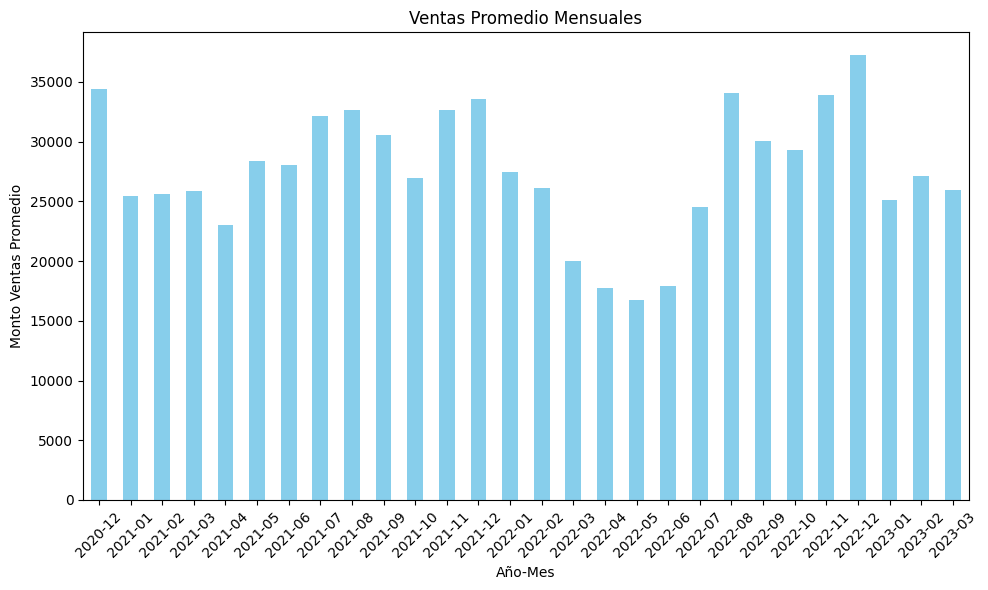

(1000, 600)

In [36]:
ventas_promedio_mensuales = ventas_promedio_mensuales.astype(float)

plt.figure(figsize=(10,6))
ventas_promedio_mensuales.plot(kind='bar', color='skyblue')
plt.title('Ventas Promedio Mensuales')
plt.xlabel('Año-Mes')
plt.ylabel('Monto Ventas Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_promedio_mensuales.png')
plt.show()
c.drawImage('ventas_promedio_mensuales.png', 20, 196, width=580, height=400)

Gráfico de Productos Más Vendidos:

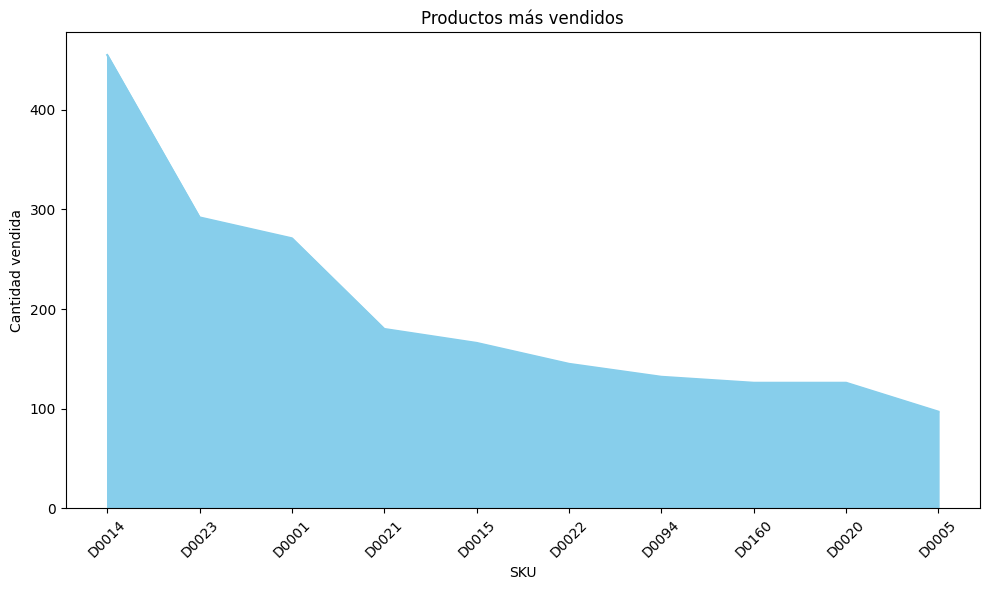

(1000, 600)

In [37]:
c.showPage()
plt.figure(figsize=(10,6))
productos_mas_vendidos.plot(kind='area', x= 'SKU', y='Cantidad', color='skyblue')
plt.title('Productos más vendidos')
plt.xlabel('SKU')
plt.ylabel('Cantidad vendida')
plt.xticks(range(10), productos_mas_vendidos.index, rotation=45)
plt.tight_layout()
plt.savefig('Productos Más Vendidos.png')
plt.show()
c.drawImage('Productos Más Vendidos.png', 20, 396, width=580, height=376)

Gráfico de Ingresos Totales por Mes

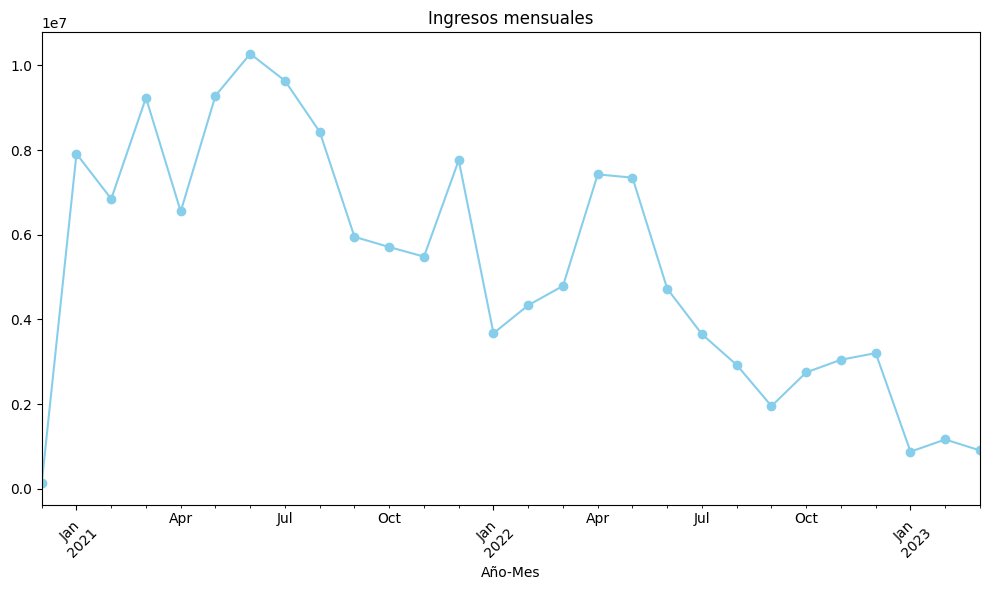

(1000, 600)

In [38]:
plt.figure(figsize=(10,6))
ventas_totales_mensuales.plot(kind='line', marker='o', color='skyblue')
plt.title('Ingresos mensuales')
xlabel = 'Año-Mes'
ylabel = 'Precio Facturable'
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Ingresos mensuales.png')
plt.show()
c.drawImage('Ingresos mensuales.png', 20, 10, width=580, height=376)

Gráfico de Retención de Clientes:

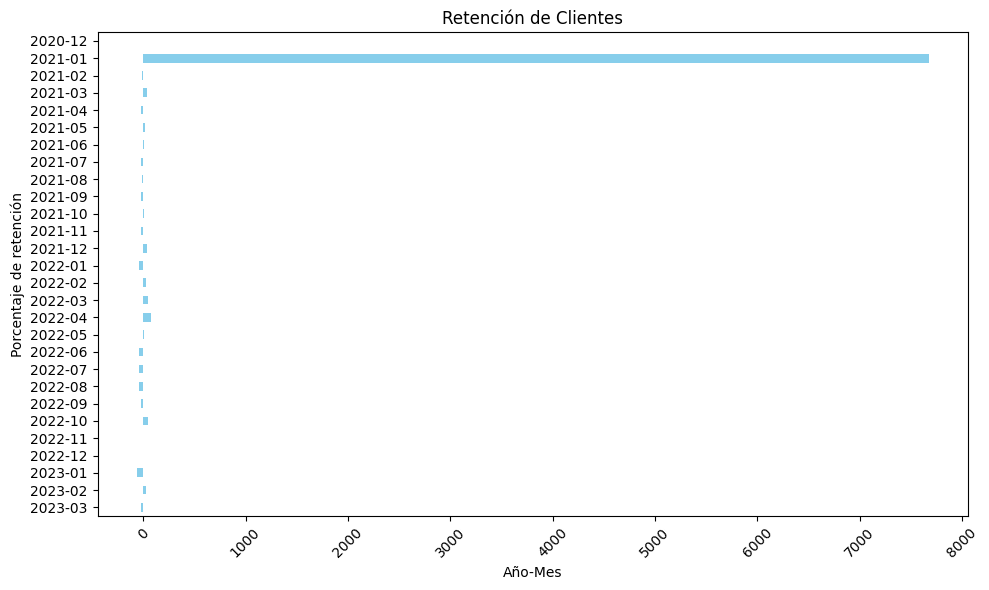

(1000, 600)

In [39]:
c.showPage()
plt.figure(figsize=(10,6))
clientes_retencion.plot(kind='barh', color='skyblue')
plt.title('Retención de Clientes')
plt.xlabel('Año-Mes')
plt.ylabel('Porcentaje de retención')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Retención de Clientes.png')
plt.show()
c.drawImage('Retención de Clientes.png', 20, 396, width=580, height=376)

Gráfico de Tendencias de Ventas por Día de la Semana:

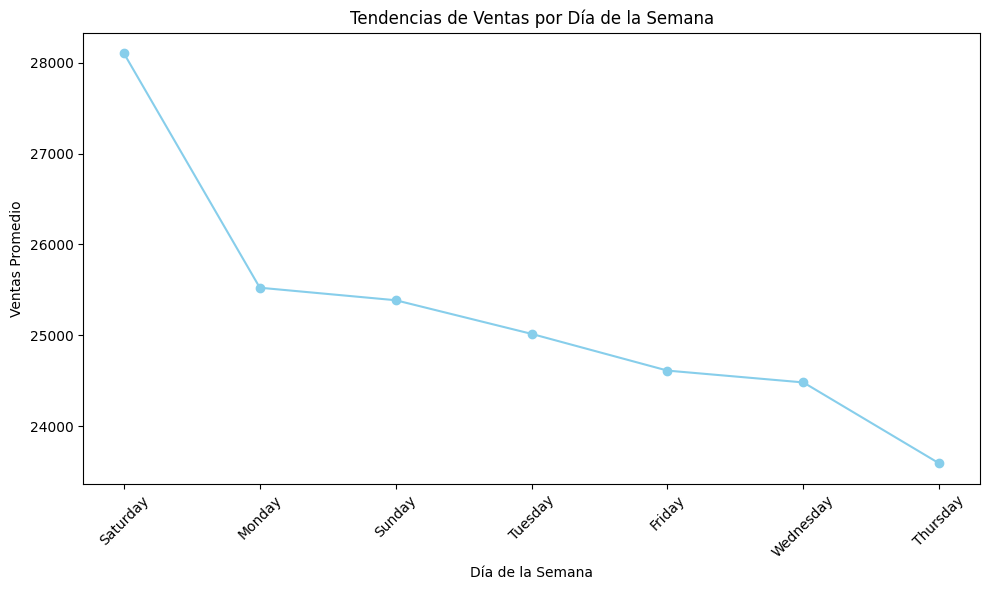

(1000, 600)

In [40]:
plt.figure(figsize=(10,6))
tendencias_dia_semana.plot(kind='line', marker='o', color='skyblue')
plt.title('Tendencias de Ventas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Tendencias de Ventas por Día de la Semana.png')
plt.show()
c.drawImage('Tendencias de Ventas por Día de la Semana.png', 20, 10, width=580, height=376)

Análisis RFM (Recencia, Frecuencia y Monto)

Cálculo de la fecha más reciente

In [41]:
# Calcular la fecha más reciente en el conjunto de datos
fecha_reciente = df['Fecha de venta'].max()
print(fecha_reciente)

2023-03-30 00:00:00


Crear un nuevo DataFrame con los valores RFM

In [42]:
rfm_df = df.groupby('RUT').agg({
    'Fecha de venta': lambda x: (fecha_reciente - x.max()).days,
    'Número de orden': 'count',
    'Precio Facturable': 'sum'
    })
rfm_df['Precio Facturable'] = rfm_df['Precio Facturable'].apply('{:.0f}'.format)
print(rfm_df)

              Fecha de venta  Número de orden Precio Facturable
RUT                                                            
\tlsppezrs-t             470                1             43608
\tltbglzbl-e             323                1             14990
 lblltrrg-l              367                1             14990
 lbortrge-b              493                2             68980
 lerlrols-t              448                3             34160
...                      ...              ...               ...
zztrgoep-b               382                1             12914
zztsrtee-k               644                1             58990
zztzsott-l               342                1             14990
zzzoslbl-p               464                1             50990
 ltbrrpoz-r              699                3             18770

[3038 rows x 3 columns]


In [43]:
# Renombrar las columnas para RFM
rfm_df.rename(columns={
    'Fecha de venta': 'Recencia',
    'Número de orden': 'Frecuencia',
    'Precio Facturable': 'Monto'
}, inplace=True)

# Cambiar el tipo de datos del dataframe, a integer (int)
rfm_df = rfm_df.astype(int)

# Imprimir los primeros 10 registros
print(rfm_df.head(10))

              Recencia  Frecuencia     Monto
RUT                                         
\tlsppezrs-t       470           1     43608
\tltbglzbl-e       323           1     14990
 lblltrrg-l        367           1     14990
 lbortrge-b        493           2     68980
 lerlrols-t        448           3     34160
 lsgslgbt-g        731           1     39990
 ltbzzzoe-p        350           2     22431
 ltzzeslr-o        765           1      5990
Sin RUT              3        2459  67550849
bbbeoss-z          101           1     10991


Segmentación RFM

**Funciones**

In [44]:
# Crear funciones para asignar valores RFM
# Función asignar_recencia
def asignar_recencia(r):
  if r <= 30:
    return 4
  elif r <= 60:
    return 3
  elif r <= 90:
    return 2
  else:
    return 1

In [45]:
# Función asignar_frecuencia
def asignar_frecuencia(f):
  if f <= 1:
    return 1
  elif f <= 2:
    return 2
  elif f <= 3:
    return 3
  else:
    return 4

In [46]:
# Función asignar_monto
def asignar_monto(m):
  if m <= 50000:
    return 1
  elif m <= 100000:
    return 2
  elif m <= 150000:
    return 3
  else:
    return 4

Aplicar las funciones a las columnas RFM

In [47]:
rfm_df['Recencia'] = rfm_df['Recencia'].apply(asignar_recencia)
rfm_df['Frecuencia'] = rfm_df['Frecuencia'].apply(asignar_frecuencia)
rfm_df['Monto'] = rfm_df['Monto'].apply(asignar_monto)

# Mostrar los primeros registros del DataFrame RFM con valores segmentados
print(rfm_df.head(10))

              Recencia  Frecuencia  Monto
RUT                                      
\tlsppezrs-t         1           1      1
\tltbglzbl-e         1           1      1
 lblltrrg-l          1           1      1
 lbortrge-b          1           2      2
 lerlrols-t          1           3      1
 lsgslgbt-g          1           1      1
 ltbzzzoe-p          1           2      1
 ltzzeslr-o          1           1      1
Sin RUT              4           4      4
bbbeoss-z            1           1      1


Análisis de Segmentos RFM

In [48]:
# Calcular el RFM combinado para cada cliente
rfm_df['RFM'] = rfm_df['Recencia'] * 100 + rfm_df['Frecuencia'] * 10 + rfm_df['Monto']

# ordenar los registros de Mayor a Menor
rfm_df = rfm_df.sort_values('RFM', ascending=False)

# Mostrar los primeros registros del DataFrame RFM con valores RFM combinados
print(rfm_df.head(10))

            Recencia  Frecuencia  Monto  RFM
RUT                                         
Sin RUT            4           4      4  444
lbltbbsz-b         4           4      3  443
ltlggrrz-g         4           2      1  421
ltgrpssl-e         4           1      1  411
lbrplree-t         4           1      1  411
lgtzrzzo-p         4           1      1  411
ltzrbtep-s         4           1      1  411
gpsegll-b          4           1      1  411
lbzrepzr-s         4           1      1  411
lsrrezzl-p         4           1      1  411


Visualizaciones

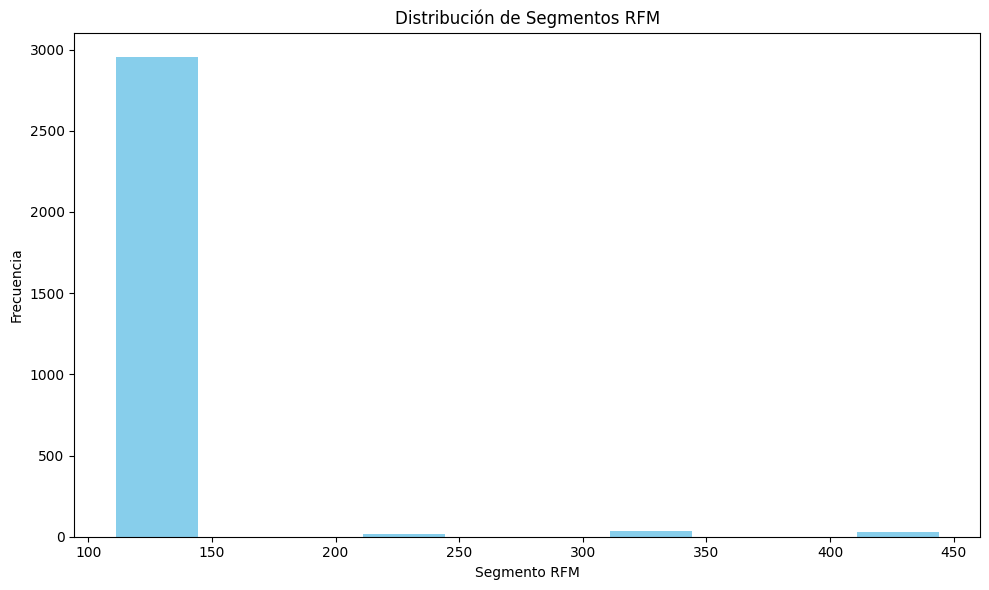

(1000, 600)

In [49]:
# Visualizar la distribución de los segmentos RFM y guardarlos en documento PDF
c.showPage()
plt.figure(figsize=(10,6))
rfm_df['RFM'].plot(kind='hist', color= 'skyblue')
plt.title('Distribución de Segmentos RFM')
plt.xlabel('Segmento RFM')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('Distribución de Segmentos RFM.png')
plt.show()
c.drawImage('Distribución de Segmentos RFM.png', 20, 396, width=580, height=376)

**Parte IV: Recomendaciones Estratégicas.**

# Generar recomendaciones estratégicas basadas en los resultados del análisis

In [50]:
# Recomendación para segmentos de alto valor:
if rfm_df['RFM'].max() >= 400:
  c.drawString(20, 380, 'Para nuestros clientes de alto valor (segmentos con RFM alto), recomendamos implementar programas de')
  c.drawString(20, 360, 'lealtad personalizados y ofertas exclusivas para fortalecer su retención y fomentar compras repetidas.')

# Recomendación para segmentos de bajo valor:
if rfm_df['RFM'].min() <= 200:
  c.drawString(20, 330, 'Para los segmentos de bajo valor (RFM bajo), sugerimos lanzar campañas de reactivación con descuentos')
  c.drawString(20, 310, 'especiales y contenido relevante para reenganchar a estos clientes.')

Guardar el PDF generado

In [51]:
c.save()